In [51]:
import torch
import tqdm
import numpy as np 
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

In [59]:
IMG_SIZE = 64

partition = 'train'
data_dir = '../../data/FairFace'
split_test = 1

In [81]:
def load_path_attr(partition, data_dir, split_test=0):
    path_data = []
    attr_data = []
    if split_test:
        path_data_test = []
        attr_data_test = []
    
    with open(os.path.join(data_dir, 'fairface_label_{}.csv'.format(partition))) as fp:
        rows = fp.readlines()
        for row in rows[1:]:
            path, _, _, race, test = row.strip().split(',')
            if not split_test:
                path_data.append(path)
                attr_data.append(race)
            else:
                if test == 'False':
                    path_data.append(path)
                    attr_data.append(race)
                else:
                    path_data_test.append(path)
                    attr_data_test.append(race)
                    
    if not split_test:
        return path_data, attr_data
    else:
        return path_data, attr_data, path_data_test, attr_data_test

In [54]:
TRAIN_IMG_PATH = '{0}_FairFace_{1}x{1}.pt'.format('train', IMG_SIZE)
TRAIN_LABEL_PATH = '{0}_labels_FairFace_{1}x{1}.pt'.format('train', IMG_SIZE)

train_path_data, train_attr_data = load_path_attr('train', data_dir)

transform = transforms.Resize(IMG_SIZE)

TRAIN_N_IMAGES = len(train_path_data)
train_data = np.zeros((TRAIN_N_IMAGES, 3, IMG_SIZE, IMG_SIZE), dtype='uint8')
train_labels = np.zeros((TRAIN_N_IMAGES))

print('starting conversion of training data...')
for i in tqdm.tqdm(range(TRAIN_N_IMAGES)):
    with Image.open(os.path.join(data_dir, '{}'.format(train_path_data[i]))) as img:
        if transform is not None:
            img = transform(img)
    img = np.array(img)
    train_data[i] = img.transpose((2, 0, 1))
    if train_attr_data[i] == 'White':
        train_labels[i] = 0
    else:
        train_labels[i] = 1
    
train_data = torch.from_numpy(train_data)
train_labels = torch.from_numpy(train_labels)

print("Saving training images to {}".format(TRAIN_IMG_PATH))
torch.save(train_data, TRAIN_IMG_PATH)
torch.save(train_labels, TRAIN_LABEL_PATH)

  0%|          | 107/86744 [00:00<01:21, 1066.42it/s]

starting conversion of training data...


100%|██████████| 86744/86744 [01:28<00:00, 975.79it/s] 


Saving training images to train_FairFace_64x64.pt


In [92]:
loaded_train_data = torch.load('../data/FairFace/train_FairFace_64x64.pt')
loaded_train_data = 2 * (loaded_train_data.float() / 255.0) - 1

loaded_train_labels = torch.load('../data/FairFace/train_labels_FairFace_64x64.pt')

loaded_train_data.shape, loaded_train_labels.shape, \
(loaded_train_labels==0).sum(), (loaded_train_labels==1).sum()

(torch.Size([86744, 3, 64, 64]),
 torch.Size([86744]),
 tensor(16527),
 tensor(70217))

In [82]:
split_test

1

In [83]:
if split_test:
    VAL_IMG_PATH = '{0}_FairFace_{1}x{1}.pt'.format('val', IMG_SIZE)
    VAL_LABEL_PATH = '{0}_labels_FairFace_{1}x{1}.pt'.format('val', IMG_SIZE)

    TEST_IMG_PATH = '{0}_FairFace_{1}x{1}.pt'.format('test', IMG_SIZE)
    TEST_LABEL_PATH = '{0}_labels_FairFace_{1}x{1}.pt'.format('test', IMG_SIZE)

    val_path_data, val_attr_data, test_path_data, test_attr_data \
    = load_path_attr('val', data_dir, split_test=split_test)

    transform = transforms.Resize(IMG_SIZE)

    VAL_N_IMAGES = len(val_path_data)
    val_data = np.zeros((VAL_N_IMAGES, 3, IMG_SIZE, IMG_SIZE), dtype='uint8')
    val_labels = np.zeros((VAL_N_IMAGES))
    
    TEST_N_IMAGES = len(test_path_data)
    test_data = np.zeros((TEST_N_IMAGES, 3, IMG_SIZE, IMG_SIZE), dtype='uint8')
    test_labels = np.zeros((TEST_N_IMAGES))

    print('starting conversion of validation data...')
    for i in tqdm.tqdm(range(VAL_N_IMAGES)):
        with Image.open(os.path.join(data_dir, '{}'.format(val_path_data[i]))) as img:
            if transform is not None:
                img = transform(img)
        img = np.array(img)
        val_data[i] = img.transpose((2, 0, 1))
        if val_attr_data[i] == 'White':
            val_labels[i] = 0
        else:
            val_labels[i] = 1
            
    print('starting conversion of test data...')
    for i in tqdm.tqdm(range(TEST_N_IMAGES)):
        with Image.open(os.path.join(data_dir, '{}'.format(test_path_data[i]))) as img:
            if transform is not None:
                img = transform(img)
        img = np.array(img)
        test_data[i] = img.transpose((2, 0, 1))
        if test_attr_data[i] == 'White':
            test_labels[i] = 0
        else:
            test_labels[i] = 1

    val_data = torch.from_numpy(val_data)
    val_labels = torch.from_numpy(val_labels)
    
    test_data = torch.from_numpy(test_data)
    test_labels = torch.from_numpy(test_labels)

    print("Saving validation images to {}".format(VAL_IMG_PATH))
    torch.save(val_data, VAL_IMG_PATH)
    torch.save(val_labels, VAL_LABEL_PATH)
    
    print("Saving test images to {}".format(TEST_IMG_PATH))
    torch.save(test_data, TEST_IMG_PATH)
    torch.save(test_labels, TEST_LABEL_PATH)

else:
    VAL_IMG_PATH = '{0}_FairFace_{1}x{1}.pt'.format('val', IMG_SIZE)
    VAL_LABEL_PATH = '{0}_labels_FairFace_{1}x{1}.pt'.format('val', IMG_SIZE)

    val_path_data, val_attr_data = load_path_attr('val', data_dir, split_test=split_test)

    transform = transforms.Resize(IMG_SIZE)

    VAL_N_IMAGES = len(val_path_data)
    val_data = np.zeros((VAL_N_IMAGES, 3, IMG_SIZE, IMG_SIZE), dtype='uint8')
    val_labels = np.zeros((VAL_N_IMAGES))

    print('starting conversion of validation data...')
    for i in tqdm.tqdm(range(VAL_N_IMAGES)):
        with Image.open(os.path.join(data_dir, '{}'.format(val_path_data[i]))) as img:
            if transform is not None:
                img = transform(img)
        img = np.array(img)
        val_data[i] = img.transpose((2, 0, 1))
        if val_attr_data[i] == 'White':
            val_labels[i] = 0
        else:
            val_labels[i] = 1

    val_data = torch.from_numpy(val_data)
    val_labels = torch.from_numpy(val_labels)

    print("Saving validation images to {}".format(VAL_IMG_PATH))
    torch.save(val_data, VAL_IMG_PATH)
    torch.save(val_labels, VAL_LABEL_PATH)

  1%|▏         | 86/5792 [00:00<00:06, 858.16it/s]

starting conversion of validation data...


  1%|          | 60/5162 [00:00<00:08, 591.36it/s]

starting conversion of test data...


100%|██████████| 5162/5162 [00:06<00:00, 785.14it/s] 


Saving validation images to val_FairFace_64x64.pt
Saving test images to test_FairFace_64x64.pt


In [89]:
loaded_val_data = torch.load('../data/FairFace/val_FairFace_64x64.pt')
loaded_val_data = 2 * (loaded_val_data.float() / 255.0) - 1

loaded_val_labels = torch.load('../data/FairFace/val_labels_FairFace_64x64.pt')

loaded_val_data.shape, loaded_val_labels.shape, \
(loaded_val_labels==0).sum(), (loaded_val_labels==1).sum()

(torch.Size([5792, 3, 64, 64]), torch.Size([5792]), tensor(1351), tensor(4441))

In [91]:
loaded_test_data = torch.load('../data/FairFace/test_FairFace_64x64.pt')
loaded_test_data = 2 * (loaded_test_data.float() / 255.0) - 1

loaded_test_labels = torch.load('../data/FairFace/test_labels_FairFace_64x64.pt')

loaded_test_data.shape, loaded_test_labels.shape, \
(loaded_test_labels==0).sum(), (loaded_test_labels==1).sum()

(torch.Size([5162, 3, 64, 64]), torch.Size([5162]), tensor(734), tensor(4428))

(array([ 5,  8, 15, 23, 24, 26, 27, 32, 40, 55]),)

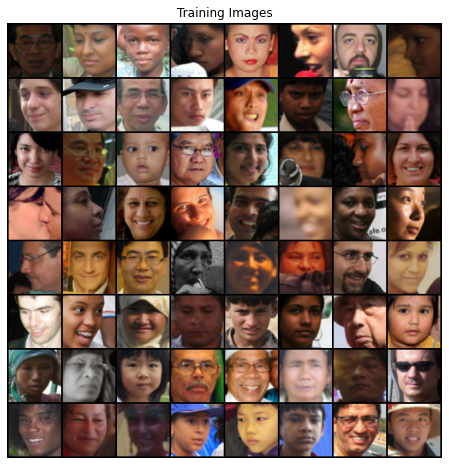

In [25]:
import torchvision.utils as vutils
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(loaded_train_data[:64].to('cpu')[:64], padding=2, normalize=True).cpu(),(1,2,0)))
np.where(loaded_train_labels[:64]==0)

In [ ]:
if __name__ == '__main__':
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument('--data_dir', default='../../data/UTKFace', type=str, 
        help='path to downloaded UTKFace dataset (e.g. /data/UTKFace/')
    parser.add_argument('--out_dir', default='../data/UTKFace', type=str, 
        help='destination of outputs')
    args = parser.parse_args()
    preprocess_images(args)